In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import numba
import timeit
import math
import itertools
from pprint import pprint
import os
from multiprocessing.pool import Pool

In [2]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

In [3]:
# не нормативные

df1 = pd.DataFrame({0: [], 1: [], 2: [], 3: []})
for file in os.listdir():
    if file[0] == 'b':
        df = pd.read_csv(file, sep="	", header=None)
        df = df.loc[:, 0:3]
        df1 = pd.concat([df, df1])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005311 entries, 0 to 88319
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1005311 non-null  float64
 1   1       1005311 non-null  float64
 2   2       1005311 non-null  float64
 3   3       1005311 non-null  float64
dtypes: float64(4)
memory usage: 38.3 MB


In [4]:
df1

,0,1,2,3
0,-5.51068,4.80685,-1.426510,0.508883
1,-9.42926,8.52212,1.434320,7.745710
2,-7.40029,5.08099,0.232017,3.162290
3,-0.57279,-5.13693,-1.682840,-3.582920
4,1.15685,-7.41859,2.811690,-5.044090
...,...,...,...,...
88315,1.65810,-6.30949,0.821900,-3.357700
88316,2.25337,-3.10576,2.791110,-3.016840
88317,2.62584,3.81460,1.330690,-0.759645
88318,5.35822,6.10521,-1.367490,0.891057


In [5]:
# нормативные

df2 = pd.DataFrame({0: [], 1: [], 2: [], 3: []})
for file in os.listdir():
    if file[0] == 'h':
        df = pd.read_csv(file, sep="	", header=None)
        df = df.loc[:, 0:3]
        df2 = pd.concat([df, df2])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015808 entries, 0 to 88831
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1015808 non-null  float64
 1   1       1015808 non-null  float64
 2   2       1015808 non-null  float64
 3   3       1015808 non-null  float64
dtypes: float64(4)
memory usage: 38.8 MB


In [6]:
df2

,0,1,2,3
0,-0.788245,-3.722690,1.068640,-0.571325
1,5.430420,-0.060704,-4.770160,0.599285
2,-15.461100,1.908580,2.549340,-0.479515
3,-5.376860,-1.321050,3.018260,-0.360609
4,8.875310,3.395750,-1.858420,2.412710
...,...,...,...,...
88827,2.809130,-3.421020,2.817560,5.418570
88828,11.952700,1.738450,4.215360,5.602480
88829,6.530280,-3.127760,-2.620330,-3.159950
88830,-8.614460,5.420640,-6.559170,-0.519373


# Спирман

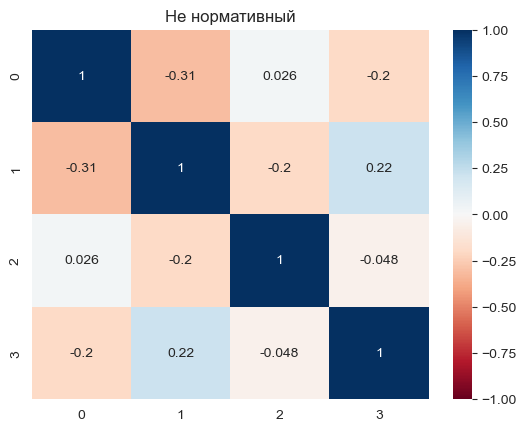

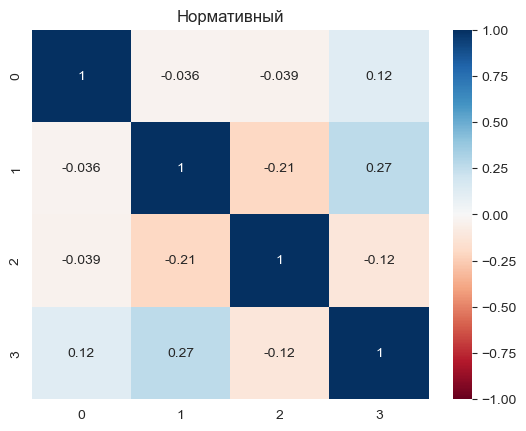

In [85]:
plt.title("Не нормативный")
sns.heatmap(stats.spearmanr(df1).correlation, annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()
plt.title("Нормативный")
sns.heatmap(stats.spearmanr(df2).correlation, annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

# Пирсон

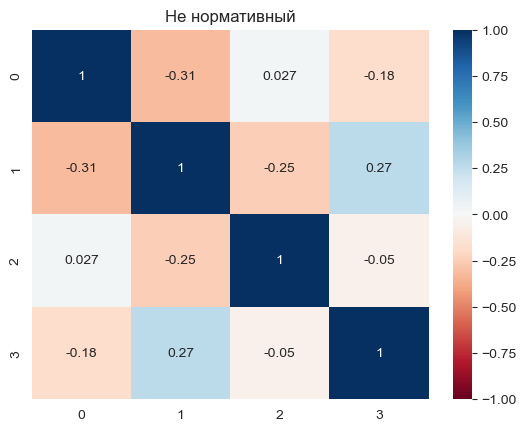

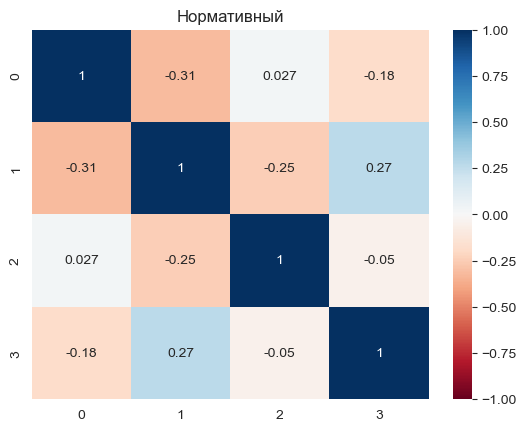

In [49]:
plt.title("Не нормативный")
df = df1
sns.heatmap(np.array(list(map(lambda x: list(map(lambda y: stats.pearsonr(*y)[0], x)),
                              [[(df[df.columns[j]], df[df.columns[i]]) for j in range(len(df.columns))]
                               for i in range(len(df.columns))]))),
            annot=True, vmin=-1, vmax=1, cmap="RdBu")

plt.show()
plt.title("Нормативный")
sns.heatmap(np.array(list(map(lambda x: list(map(lambda y: stats.pearsonr(*y)[0], x)),
                              [[(df[df.columns[j]], df[df.columns[i]]) for j in range(len(df.columns))]
                               for i in range(len(df.columns))]))),
            annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

# Кендала

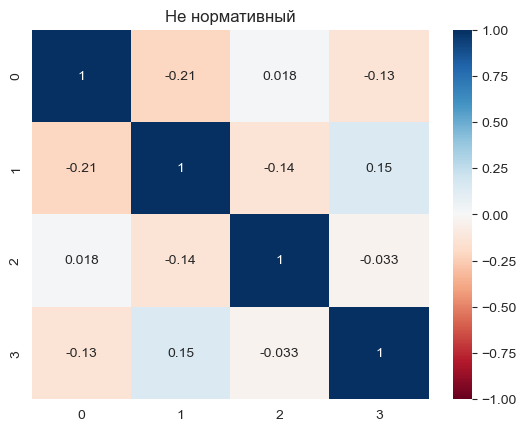

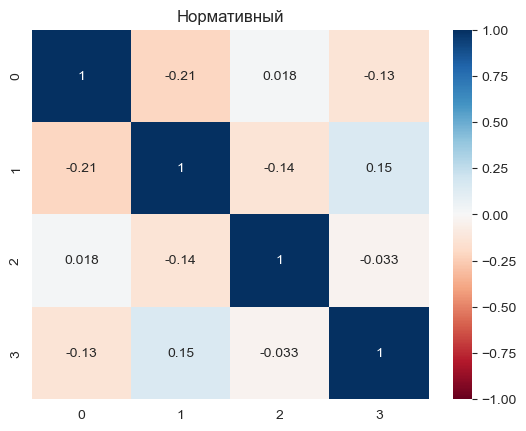

In [50]:
plt.title("Не нормативный")
df = df1
sns.heatmap(np.array(list(map(lambda x: list(map(lambda y: stats.kendalltau(*y)[0], x)),
                              [[(df[df.columns[j]], df[df.columns[i]]) for j in range(len(df.columns))]
                               for i in range(len(df.columns))]))),
            annot=True, vmin=-1, vmax=1, cmap="RdBu")

plt.show()
plt.title("Нормативный")
sns.heatmap(np.array(list(map(lambda x: list(map(lambda y: stats.kendalltau(*y)[0], x)),
                              [[(df[df.columns[j]], df[df.columns[i]]) for j in range(len(df.columns))]
                               for i in range(len(df.columns))]))),
            annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()